[[ 1.84653649  0.7201045   1.42099276 -0.60316121  3.57139525 -0.31204235
   1.80539625 -0.42251091  2.12921378  0.52255238  1.25385866 -0.46117191
   1.00264356 -0.7727859   0.16511485  0.36824274 -1.02475559  0.45230394
  -1.11718176 -1.02948823 -0.10798427 -0.08943574  1.40264464 -1.7895093
  -0.16424806 -1.44106937  0.26755628 -1.1574337  -1.09803987  0.38695932]
 [-0.35945508  1.48787678  0.76972538 -0.13047985  1.08748293 -0.07758753
   2.20258956 -0.88335398 -1.66730179 -0.80560449  0.27935413 -0.56915054
   0.93867918  1.21655221  0.26352396  0.08766986 -1.21423635  0.43148326
  -0.78761701  0.557666   -0.86036217 -0.02394821 -0.17215741 -1.14081245
   1.52864045  0.76485298 -0.27087681  2.78111802  0.17235838  2.26317494]]
[ 94.55571573 210.64059542]
LinearSVR()
R-squared: 1.0
CV mean score:  1.0
MSE:  1.1261809358547642e-22
RMSE:  5.630904679273821e-23


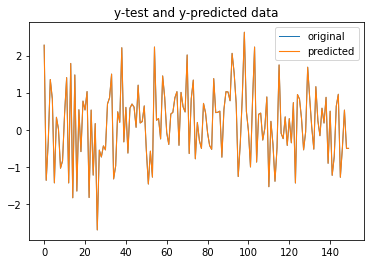

Boston housing dataset prediction.
R-squared: 0.6913951013416222
CV mean score:  0.2765648178736405
MSE:  0.2086107387481376
RMSE:  0.1043053693740688


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

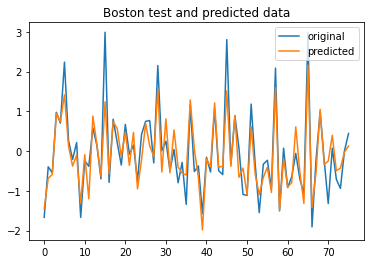

In [4]:
# sample from outer source

from sklearn.svm import LinearSVR
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

#stworzenie próbek
x, y = make_regression(n_samples=1000, n_features=30)
print(x[0:2])
print(y[0:2])

x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)
#wybór metody machine learning
lsvr = LinearSVR()
print(lsvr)

lsvr.fit(xtrain, ytrain)

score = lsvr.score(xtrain, ytrain)
print("R-squared:", score)

#metoda dla modelu cross-validation oraz sprawdzenie dokładności po trenowaniu modelu  
cv_score = cross_val_score(lsvr, x, y, cv=10)
print("CV mean score: ", cv_score.mean())

ypred = lsvr.predict(xtest)

# sprawdzenie dokładności danych przewidywanych względem rzeczywistych używając metod MSE and RMSE 
mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
#wizualizacja danych rzeczywistych i przewidywanych dla modelu na wykresie.
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.legend()
plt.show()

#dane z przykładowej bazy danych
print("Boston housing dataset prediction.")
boston = load_boston()
x, y = boston.data, boston.target

x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

lsvr = LinearSVR()
lsvr.fit(xtrain, ytrain)

score = lsvr.score(xtrain, ytrain)
print("R-squared:", score)
#najcześciej k=5 lub k=10 ; im większe k tym mniejszy margines błędu między przewidywaniami a rzeczywistością
cv_score = cross_val_score(lsvr, x, y, cv=10)
print("CV mean score: ", cv_score.mean())

ypred = lsvr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()